In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iot-dataset/device_4_dataset.csv')

In [4]:
data.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,type
0,1.000000,60.0,0.000000e+00,1.000000,60.0,0.0,1.000000,60.0,0.0,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.00000,0.0,0.0,benign
1,1.000000,60.0,0.000000e+00,1.000000,60.0,0.0,1.000000,60.0,0.0,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.00000,0.0,0.0,benign
2,1.000000,342.0,0.000000e+00,1.000000,342.0,0.0,1.000000,342.0,0.0,1.000000,...,0.0,0.0,6.249414,449.603272,122.911136,449.603272,15107.14730,0.0,0.0,benign
3,1.963325,342.0,4.370000e-11,1.977831,342.0,0.0,1.992555,342.0,0.0,1.999253,...,0.0,0.0,7.248947,434.759286,120.000074,434.759286,14400.01777,0.0,0.0,benign
4,1.000000,60.0,0.000000e+00,1.000000,60.0,0.0,1.000000,60.0,0.0,1.000000,...,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.00000,0.0,0.0,benign


In [6]:

data.groupby('type')['type'].count()

type
benign            175240
gafgyt_combo       58152
gafgyt_junk        28349
gafgyt_scan        27859
gafgyt_tcp         92581
gafgyt_udp        105782
mirai_ack          91123
mirai_scan        103621
mirai_syn         118128
mirai_udp         217034
mirai_udpplain     80808
Name: type, dtype: int64

In [7]:
data.drop(data[data["type"] == "gafgyt_tcp"].index, inplace = True)
data.drop(data[data["type"] == "gafgyt_udp"].index, inplace = True)
data.drop(data[data["type"] == "mirai_ack"].index, inplace = True)
data.drop(data[data["type"] == "mirai_scan"].index, inplace = True)
data.drop(data[data["type"] == "mirai_syn"].index, inplace = True)
data.drop(data[data["type"] == "mirai_udp"].index, inplace = True)
data.drop(data[data["type"] == "mirai_udpplain"].index, inplace = True)

In [8]:
data.groupby('type')['type'].count()

type
benign          175240
gafgyt_combo     58152
gafgyt_junk      28349
gafgyt_scan      27859
Name: type, dtype: int64

In [9]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [10]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
x, y = rus.fit_resample(x, y)


In [11]:
from collections import Counter
print(sorted(Counter(y).items()))

[('benign', 27859), ('gafgyt_combo', 27859), ('gafgyt_junk', 27859), ('gafgyt_scan', 27859)]


In [12]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [ ]:
#standardize numerical columns
# def standardize(df,col):
#     df[col]= (df[col]-df[col].mean())/df[col].std()
# data_st=data.copy()
# for i in (data_st.iloc[:,:-1].columns):
#     standardize (data_st,i)
# data_st.head()

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,shuffle=True)

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [15]:
from keras import Sequential
from keras.layers import Dense

classifier = Sequential()

In [16]:
#First Hidden Layer
classifier.add(Dense(64, activation='relu', kernel_initializer='random_normal', input_dim=115))
#Second  Hidden Layer
classifier.add(Dense(32, activation='relu', kernel_initializer='random_normal'))

classifier.add(Dense(16, activation='relu', kernel_initializer='random_normal'))

#Output Layer
classifier.add(Dense(4, activation='sigmoid', kernel_initializer='random_normal'))

In [17]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='sparse_categorical_crossentropy', metrics =['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                7424      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 4)                 68        
                                                                 
Total params: 10,100
Trainable params: 10,100
Non-trainable params: 0
_________________________________________________________________


In [18]:
#Fitting the data to the training dataset
history = classifier.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=10)

Epoch 1/10
2786/2786 [==============================] - 8s 3ms/step - loss: 0.2650 - accuracy: 0.8731 - val_loss: 0.1863 - val_accuracy: 0.9079
Epoch 2/10
2786/2786 [==============================] - 6s 2ms/step - loss: 0.0874 - accuracy: 0.9650 - val_loss: 0.0400 - val_accuracy: 0.9874
Epoch 3/10
2786/2786 [==============================] - 6s 2ms/step - loss: 0.0333 - accuracy: 0.9886 - val_loss: 0.0582 - val_accuracy: 0.9826
Epoch 4/10
2786/2786 [==============================] - 6s 2ms/step - loss: 0.0232 - accuracy: 0.9919 - val_loss: 0.0184 - val_accuracy: 0.9923
Epoch 5/10
2786/2786 [==============================] - 6s 2ms/step - loss: 0.0195 - accuracy: 0.9928 - val_loss: 0.0171 - val_accuracy: 0.9925
Epoch 6/10
2786/2786 [==============================] - 6s 2ms/step - loss: 0.0189 - accuracy: 0.9931 - val_loss: 0.0417 - val_accuracy: 0.9862
Epoch 7/10
2786/2786 [==============================] - 6s 2ms/step - loss: 0.0163 - accuracy: 0.9939 - val_loss: 0.0101 - val_accuracy:

In [19]:
y_pred=classifier.predict(X_test)
y_pred = y_pred.argmax(axis=-1)

# **ploting and results**





In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, matthews_corrcoef, f1_score, precision_score, recall_score

In [21]:
print(f"Accuracy   : {accuracy_score(y_test, y_pred)}")
# print(f"Precision  : {precision_score(y_test, y_pred)}")
# print(f"F1-Measure : {f1_score(y_test, y_pred)}")
print(f"MCC        : {matthews_corrcoef(y_test, y_pred)}")
# print(f"Recall     : {recall_score(y_test, y_pred)}")

Accuracy   : 0.9980258435032304
MCC        : 0.9973715111092265


In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5420
           1       1.00      0.99      1.00      5696
           2       0.99      1.00      1.00      5609
           3       1.00      1.00      1.00      5563

    accuracy                           1.00     22288
   macro avg       1.00      1.00      1.00     22288
weighted avg       1.00      1.00      1.00     22288



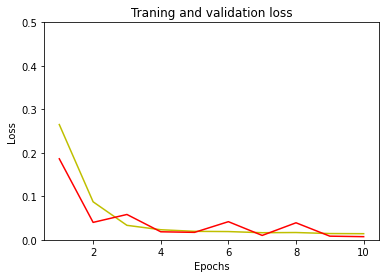

In [23]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss) + 1)
plt.plot(epochs,loss,'y',label='Tranning loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Traning and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 0.5])
plt.show()

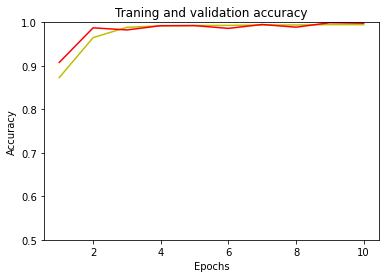

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Traning and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.show()

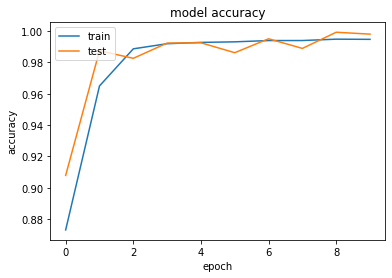

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

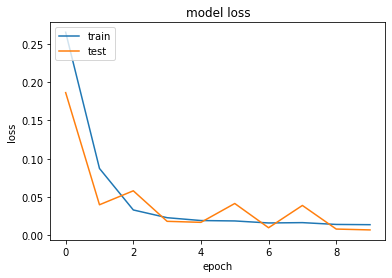

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

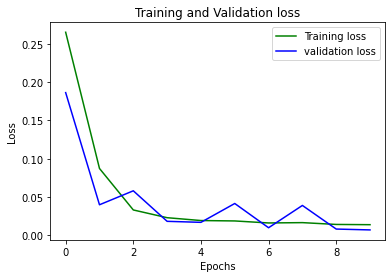

In [29]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,10)
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

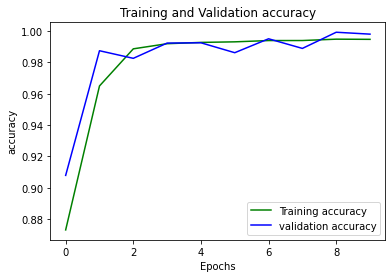

In [32]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,10)
plt.plot(acc_train, 'g', label='Training accuracy')
plt.plot(acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [43]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# # Add traces
# fig.add_trace(
#     go.Scatter( y=history.history['val_loss'], name="val_loss"),
#     secondary_y=False,
# )

# fig.add_trace(
#     go.Scatter( y=history.history['loss'], name="loss"),
#     secondary_y=False,
# )

fig.add_trace(
    go.Scatter( y=history.history['val_accuracy'], name="val accuracy"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter( y=history.history['accuracy'], name="accuracy"),
    secondary_y=False,
)

# Add figure title
fig.update_layout(
    title_text="Loss/Accuracy of ANN Model"
)

# Set x-axis title
fig.update_xaxes(title_text="Epoch")

# Set y-axes titles
fig.update_yaxes(title_text="<b>primary</b> Loss", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> Accuracy", secondary_y=True)

fig.show()


[[5417    0    3    0]
 [   0 5658   38    0]
 [   0    1 5608    0]
 [   2    0    0 5561]]


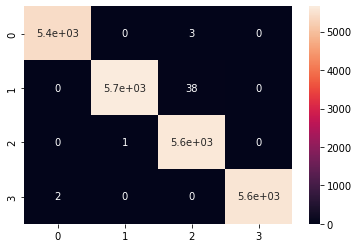

In [39]:
#Confusion matrix 
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)